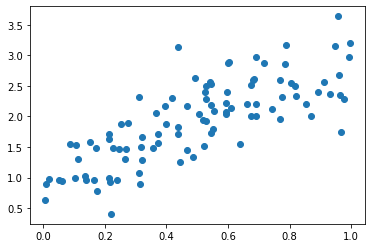

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x_data = np.random.uniform(size=(100,1)) # (100,1)
noise = np.random.normal(size=(100,1)) # (100,1)
y_data = 2 * x_data + 1 + 0.4 * noise # (100,1)

plt.plot(x_data.reshape((-1,)), y_data.reshape((-1,)), 'o')
plt.show()

In [32]:
import tensorflow as tf
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (100,1), name='x')
y = tf.placeholder(tf.float32, (100,1), name='y')

init_w = tf.keras.initializers.ones()
w = tf.get_variable('w', (1,1), tf.float32, init_w)

y_pred = x @ w # (100,1) @ (1,1) = (100,1) 

diff = y - y_pred
loss = tf.nn.l2_loss(diff)

In [22]:
print(x.dtype) # (100,1)
print(w.dtype) # (1,1)
print(y_pred.dtype) # (100,1)

<dtype: 'float32'>
<dtype: 'float32_ref'>
<dtype: 'float32'>


In [23]:
print(x)
print(w)
print(y_pred)

Tensor("x:0", shape=(100, 1), dtype=float32)
<tf.Variable 'w:0' shape=(1, 1) dtype=float32_ref>
Tensor("matmul:0", shape=(100, 1), dtype=float32)


In [33]:
g = tf.get_default_graph()
for op in g.get_operations():
    print(op.name)

x
y
w/Initializer/ones
w
w/Assign
w/read
matmul
sub
L2Loss


In [34]:
for op in g.get_operations():
    for tensor in op.inputs:
        print(tensor)
    print('----------')

----------
----------
----------
----------
Tensor("w:0", shape=(1, 1), dtype=float32_ref)
Tensor("w/Initializer/ones:0", shape=(1, 1), dtype=float32)
----------
Tensor("w:0", shape=(1, 1), dtype=float32_ref)
----------
Tensor("x:0", shape=(100, 1), dtype=float32)
Tensor("w/read:0", shape=(1, 1), dtype=float32)
----------
Tensor("y:0", shape=(100, 1), dtype=float32)
Tensor("matmul:0", shape=(100, 1), dtype=float32)
----------
Tensor("sub:0", shape=(100, 1), dtype=float32)
----------


In [35]:
for op in g.get_operations():
    for tensor in op.outputs:
        print(tensor)
    print('----------')

Tensor("x:0", shape=(100, 1), dtype=float32)
----------
Tensor("y:0", shape=(100, 1), dtype=float32)
----------
Tensor("w/Initializer/ones:0", shape=(1, 1), dtype=float32)
----------
Tensor("w:0", shape=(1, 1), dtype=float32_ref)
----------
Tensor("w/Assign:0", shape=(1, 1), dtype=float32_ref)
----------
Tensor("w/read:0", shape=(1, 1), dtype=float32)
----------
Tensor("matmul:0", shape=(100, 1), dtype=float32)
----------
Tensor("sub:0", shape=(100, 1), dtype=float32)
----------
Tensor("L2Loss:0", shape=(), dtype=float32)
----------
